In [90]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [91]:
cities_path = os.path.join("..","Resources","cities_housing_new.csv")
# national_path = os.path.join("..","Resources","national_housing.csv")
# states_path = os.path.join("..","Resources","tx_housing.csv")

In [92]:
housing_df = pd.read_csv(cities_path)
# national_housing_df = pd.read_csv(national_path)
# states_housing_df = pd.read_csv(states_path)

In [93]:
# housing_df = cities_housing_df.append([national_housing_df, states_housing_df])
# housing_df = cities_housing_df.append(national_housing_df)
housing_df.head()

,Region,Month of Period End,Property Type,Region Type,Seasonally Adjusted,State Code,Avg Sale To List,Avg Sale To List Mom,Avg Sale To List Yoy,Homes Sold,...,Inventory Yoy,Median Dom,Median Dom Mom,Median Dom Yoy,Median Sale Price,Median Sale Price Mom,Median Sale Price Yoy,New Listings,New Listings Mom,New Listings Yoy
0,"Sugar Land, TX",February 2012,All Residential,Place/City,False,TX,0.952058,-0.5%,0.6%,113,...,-27.9%,88,9.0,10.0,$220K,-0.7%,-5.0%,183,27.1%,-9.0%
1,"Missouri City, TX",February 2012,All Residential,Place/City,False,TX,0.966081,1.6%,1.7%,88,...,-27.8%,105,-2.0,17.0,$185K,7.5%,9.4%,154,13.2%,13.2%
2,"Galveston, TX",May 2012,All Residential,Place/City,False,TX,0.936675,-1.1%,-6.3%,97,...,19.3%,77,15.0,42.0,$139K,-6.1%,-9.8%,130,-11.0%,62.5%
3,"Texas City, TX",May 2012,All Residential,Place/City,False,TX,0.949948,2.0%,-6.3%,30,...,21.8%,61,-9.0,56.0,$84K,23.0%,222.4%,43,-27.1%,34.4%
4,"Baytown, TX",July 2012,All Residential,Place/City,False,TX,0.981432,1.4%,0.8%,84,...,-15.0%,69,12.0,5.0,$120K,0.2%,9.0%,110,-22.0%,20.9%


In [94]:
# DELETE  output = os.path.join("..","Resources","housing_data_merged.csv")
# housing_df.to_csv(output)


housing_df["Median Sale Price"] = housing_df["Median Sale Price"].str.lower().replace('k','',regex=True)
housing_df["Median Sale Price"] = housing_df["Median Sale Price"].str.replace('$','',regex=True)
housing_df["Median Sale Price"] = housing_df["Median Sale Price"].astype(float)
housing_df["Median Sale Price"] = housing_df["Median Sale Price"] * 1000


# ADDING MONTH SUPPLY

housing_df["Month Supply"] = round(((housing_df["Inventory"] + housing_df["New Listings"]) / housing_df["Homes Sold"]),4)
housing_df



,Region,Month of Period End,Property Type,Region Type,Seasonally Adjusted,State Code,Avg Sale To List,Avg Sale To List Mom,Avg Sale To List Yoy,Homes Sold,...,Median Dom,Median Dom Mom,Median Dom Yoy,Median Sale Price,Median Sale Price Mom,Median Sale Price Yoy,New Listings,New Listings Mom,New Listings Yoy,Month Supply
0,"Sugar Land, TX",February 2012,All Residential,Place/City,False,TX,0.952058,-0.5%,0.6%,113,...,88,9.0,10.0,220000.0,-0.7%,-5.0%,183,27.1%,-9.0%,6.6018
1,"Missouri City, TX",February 2012,All Residential,Place/City,False,TX,0.966081,1.6%,1.7%,88,...,105,-2.0,17.0,185000.0,7.5%,9.4%,154,13.2%,13.2%,7.3636
2,"Galveston, TX",May 2012,All Residential,Place/City,False,TX,0.936675,-1.1%,-6.3%,97,...,77,15.0,42.0,139000.0,-6.1%,-9.8%,130,-11.0%,62.5%,7.7629
3,"Texas City, TX",May 2012,All Residential,Place/City,False,TX,0.949948,2.0%,-6.3%,30,...,61,-9.0,56.0,84000.0,23.0%,222.4%,43,-27.1%,34.4%,8.7000
4,"Baytown, TX",July 2012,All Residential,Place/City,False,TX,0.981432,1.4%,0.8%,84,...,69,12.0,5.0,120000.0,0.2%,9.0%,110,-22.0%,20.9%,6.5714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,"League City, TX",March 2018,All Residential,Place/City,False,TX,0.986064,1.1%,0.2%,171,...,31,-28.0,-6.0,275000.0,3.1%,7.8%,206,30.4%,-10.4%,3.0877
1036,"Pasadena, TX",November 2018,All Residential,Place/City,False,TX,0.968382,-0.1%,-0.2%,61,...,19,1.0,-13.0,174000.0,12.7%,2.4%,85,-14.1%,11.8%,4.8689
1037,"Galveston, TX",April 2019,All Residential,Place/City,False,TX,0.958958,-0.9%,-0.1%,142,...,44,-24.0,3.0,250000.0,-7.4%,4.4%,201,-12.6%,-2.4%,5.8380
1038,"Missouri City, TX",February 2020,All Residential,Place/City,False,TX,0.973769,0.5%,0.7%,139,...,67,12.0,-5.0,250000.0,6.7%,8.5%,224,43.6%,36.6%,5.1583


In [95]:
housing_df.describe()

,Avg Sale To List,Homes Sold,Inventory,Median Dom,Median Dom Mom,Median Dom Yoy,Median Sale Price,New Listings,Month Supply
count,1040.000000,1040.000000,1040.000000,1040.000000,1038.000000,1030.000000,1040.000000,1040.000000,1040.000000
mean,0.970292,343.250962,1170.173077,43.485577,-0.531792,-6.188350,198752.884615,449.114423,4.916109
std,0.013281,740.950538,2549.680581,23.495946,16.260074,34.495383,61869.429179,986.661033,2.064490
min,0.889938,12.000000,41.000000,7.000000,-71.000000,-661.000000,55000.000000,21.000000,1.690500
25%,0.964961,62.000000,190.000000,26.000000,-8.000000,-15.000000,157000.000000,78.000000,3.533600
50%,0.972526,99.000000,345.500000,38.500000,0.000000,-2.000000,190000.000000,124.000000,4.447550
75%,0.979261,159.000000,565.500000,56.000000,7.000000,7.000000,240250.000000,194.250000,5.834475
max,1.006847,3609.000000,11298.000000,141.000000,71.000000,99.000000,389000.000000,4597.000000,19.485700


In [96]:
housing_df["Month of Period End"] = pd.to_datetime(housing_df["Month of Period End"],format='%B %Y')

# grouped__housing_df = housing_df.groupby("Region")
# housing_df = housing_df.sort_values(by="Month of Period End")

grouped_housing = housing_df.groupby([housing_df["Region"], housing_df["Month of Period End"].dt.year])

# grouped_housing = housing_df["Month of Period End"].dt.year]).median()
                                     
grouped_housing_df = grouped_housing.agg(MedianSalePrice=pd.NamedAgg(column='Median Sale Price', aggfunc='mean'))


# grouped_housing = grouped_housing.reset_index(inplace = True)
grouped_housing_df.head(25)


MedianSalePrice
Region          Month of Period End                 
Baytown, TX     2012                   116000.000000
                2013                   123000.000000
                2014                   138333.333333
                2015                   151833.333333
                2016                   167083.333333
                2017                   175833.333333
                2018                   187250.000000
                2019                   195500.000000
                2020                   206000.000000
Friendswood, TX 2012                   184916.666667
                2013                   195166.666667
                2014                   214250.000000
                2015                   214833.333333
                2016                   263500.000000
                2017                   265000.000000
                2018                   257083.333333
                2019                   281083.333333
                2020                   295750.000000
Galveston, TX   2012                   152083.333333
                2013                   170000.000000
                2014                   178333.333333
                2015                   172166.666667
                2016                   194416.666667
                2017                   208166.666667
                2018                   222833.333333

In [97]:
grouped_housing_df.unstack(level=0).columns

MultiIndex([('MedianSalePrice',       'Baytown, TX'),
            ('MedianSalePrice',   'Friendswood, TX'),
            ('MedianSalePrice',     'Galveston, TX'),
            ('MedianSalePrice',       'Houston, TX'),
            ('MedianSalePrice',      'La Porte, TX'),
            ('MedianSalePrice',   'League City, TX'),
            ('MedianSalePrice', 'Missouri City, TX'),
            ('MedianSalePrice',      'Pasadena, TX'),
            ('MedianSalePrice',    'Sugar Land, TX'),
            ('MedianSalePrice',    'Texas City, TX')],
           names=[None, 'Region'])

In [98]:
y_axis = grouped_housing_df["MedianSalePrice"].unique()

Text(0.5, 1.0, 'Median Sale Price per City')

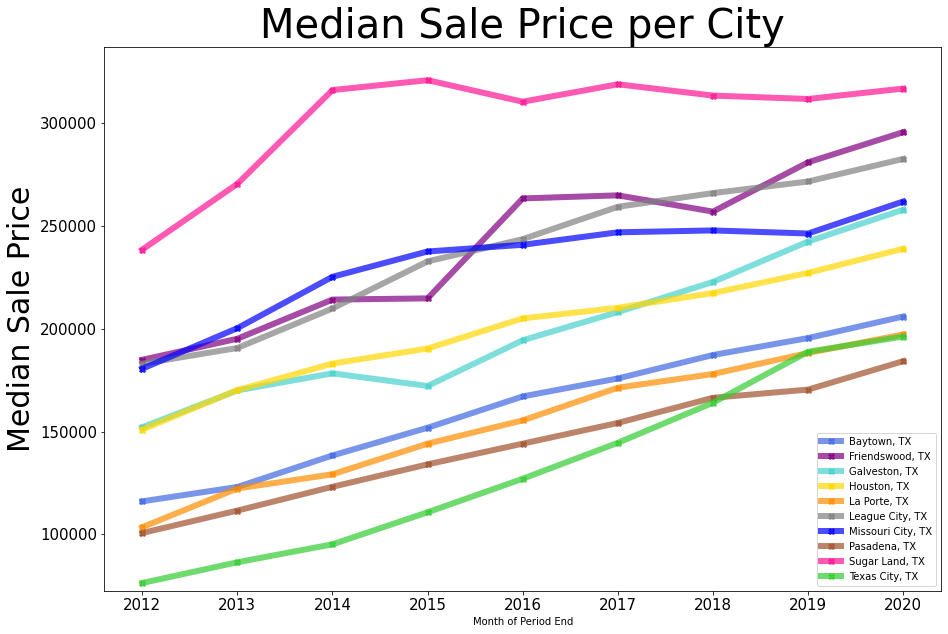

In [106]:
# unstacked_housing = grouped_housing_df.unstack(level=0)

colors = ["royalblue", "purple", "mediumturquoise", "gold", "darkorange", "grey", "blue", "sienna", "deeppink", "limegreen"]
# alphas = [1, .4, 1, 1, .4, .4, .4, 1, 1, .4]
unstacked_housing.plot.line(legend=False, figsize = (15,10), alpha = .7, linewidth = 6, marker="X", color=colors )
plt.legend(labels = [x[1] for x in unstacked_housing.columns.tolist()], loc="best")
plt.ylabel("Median Housing Prices per City", fontsize = 30)
plt.ylim(y_axis.min()*.95,y_axis.max()*1.05)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title("Median Sale Price per City", fontsize = 40)


Text(0.5, 1.0, 'Median Sale Price per City')

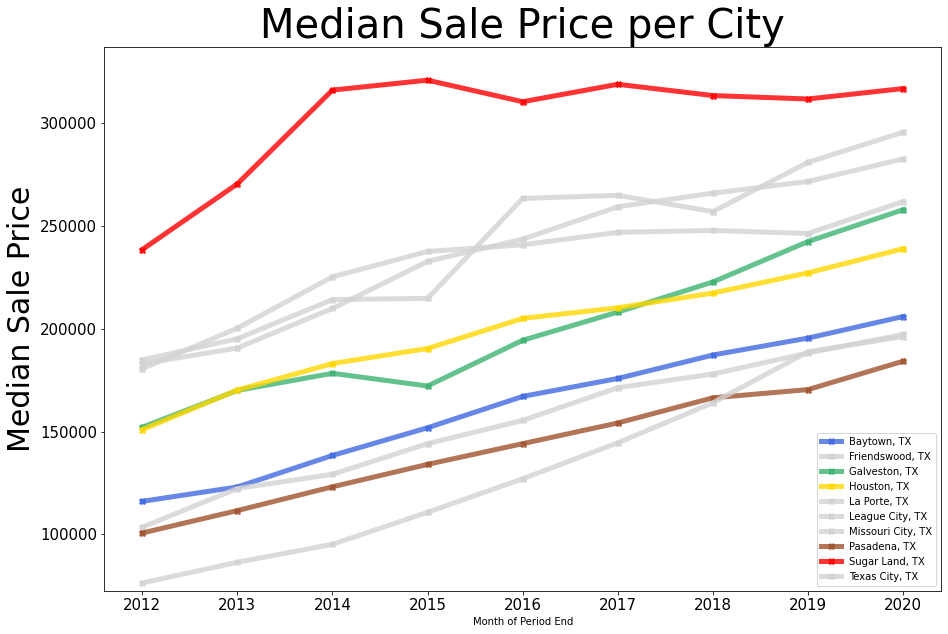

In [44]:

colors = ["royalblue", "lightgrey", "mediumseagreen", "gold", "lightgrey", "lightgrey", "lightgrey", "sienna", "red", "lightgrey"]
# alphas = [1, .4, 1, 1, .4, .4, .4, 1, 1, .4]
unstacked_housing.plot.line(legend=False, figsize = (15,10), alpha = .8, linewidth = 5, marker="X", color=colors )
plt.legend(labels = [x[1] for x in unstacked_housing.columns.tolist()], loc="best")
plt.ylabel("Median Sale Price", fontsize = 30)
plt.ylim(y_axis.min()*.95,y_axis.max()*1.05)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title("Median Sale Price per City", fontsize = 40)

## Median Housing Price per City (line  graph)

array(['Texas City, TX', ' National', 'Missouri City, TX',
       'Sugar Land, TX', 'Conroe, TX', 'League City, TX', 'Galveston, TX',
       'Baytown, TX', 'Texas', 'Houston, TX', 'Pasadena, TX',
       'Friendswood, TX'], dtype=object)

KeyError: False

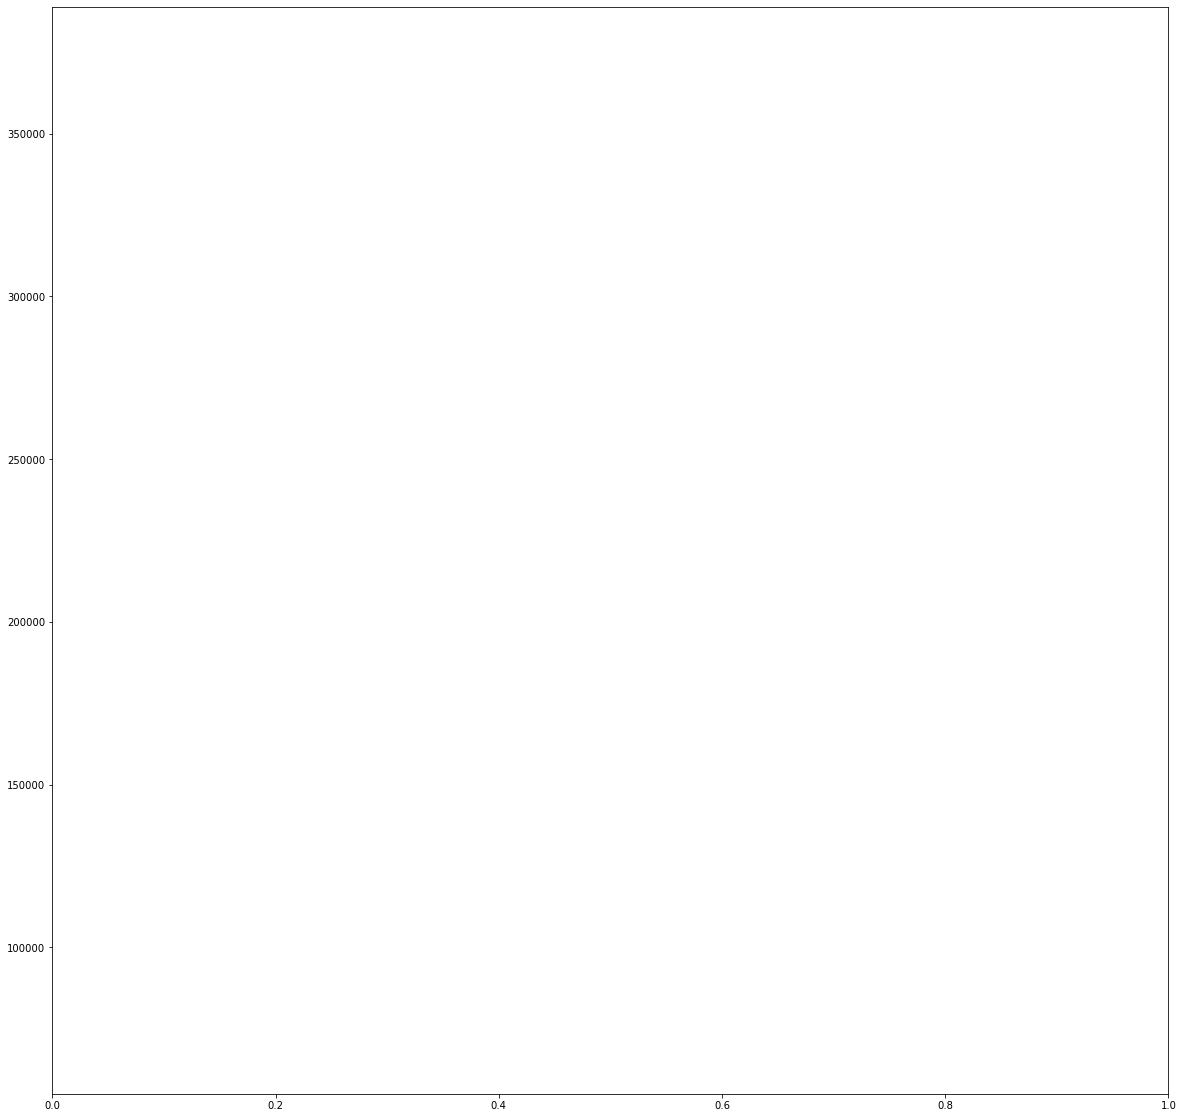

In [108]:
#DELETE - ONLY KEEP NOW TO REFERENCE CHARTING LAYOUT OPTIONS
# for city in city_list:
#     to_graph = grouped_housing_df.loc[grouped_housing_df.index[0] == city]
#     plt.plot(to_graph.index[1],to_graph["MedianSalePrice"], label=city, alpha = .6, linewidth = 1, color= "grey")
#     plt.legend(loc="best")
    
# houston = housing_df.loc[housing_df["Region"] == "Houston, TX"]
# plt.plot(houston["Month of Period End"],houston["Median Sale Price"], color="orange", alpha = 1, linewidth= 2, label="Houston, TX")

# plt.plot(grouped_housing_df.index,grouped_housing_df["MedianSalePrice"], label=city, alpha = .6, linewidth = 1, color= "grey")
# plt.legend(loc="best")
    

In [27]:
# grouped_housing_df = housing_df.groupby('Region')

#DELETE - ONLY KEEP NOW TO REFERENCE CHARTING LAYOUT OPTIONS

# houston = housing_df.loc[housing_df["Region"] == "Houston, TX"]
# plt.figure(figsize = (10,5))
# plt.plot(houston["Month of Period End"],houston["Median Sale Price"], label="Houston")
# plt.ylim(min(housing_df["Median Sale Price"])*.95, max(housing_df["Median Sale Price"])*1.05)
# plt.xticks(rotation=90)
# plt.ylabel("Median Sale Price")
# plt.title("Median Sale Price per Area")
# plt.legend(loc="best")
# plt.tight_layout()


SyntaxError: invalid syntax (<ipython-input-27-c89fb8d637e5>, line 6)

## Month Supply

(Inventory + New listings) / Homes sold

In [62]:
grouped_supply_df = grouped_housing.agg(Month_Supply_Avg=pd.NamedAgg(column='Month Supply', aggfunc='mean'))
grouped_supply_df.head(25)

Month_Supply_Avg
Region          Month of Period End                  
Baytown, TX     2012                         7.232933
                2013                         5.974392
                2014                         4.458083
                2015                         4.069383
                2016                         3.815517
                2017                         3.760792
                2018                         4.086750
                2019                         4.390833
                2020                         4.624038
Friendswood, TX 2012                         5.739083
                2013                         4.441125
                2014                         3.405650
                2015                         3.333942
                2016                         3.665958
                2017                         4.173342
                2018                         4.171483
                2019                         3.779700
                2020                         3.375913
Galveston, TX   2012                        10.664492
                2013                         9.305108
                2014                         7.965800
                2015                         7.623775
                2016                         7.830900
                2017                         7.260992
                2018                         6.897292

In [64]:
grouped_supply_df.unstack(level=0).columns

MultiIndex([('Month_Supply_Avg',       'Baytown, TX'),
            ('Month_Supply_Avg',   'Friendswood, TX'),
            ('Month_Supply_Avg',     'Galveston, TX'),
            ('Month_Supply_Avg',       'Houston, TX'),
            ('Month_Supply_Avg',      'La Porte, TX'),
            ('Month_Supply_Avg',   'League City, TX'),
            ('Month_Supply_Avg', 'Missouri City, TX'),
            ('Month_Supply_Avg',      'Pasadena, TX'),
            ('Month_Supply_Avg',    'Sugar Land, TX'),
            ('Month_Supply_Avg',    'Texas City, TX')],
           names=[None, 'Region'])

Text(0.5, 1.0, 'Month Supply per City')

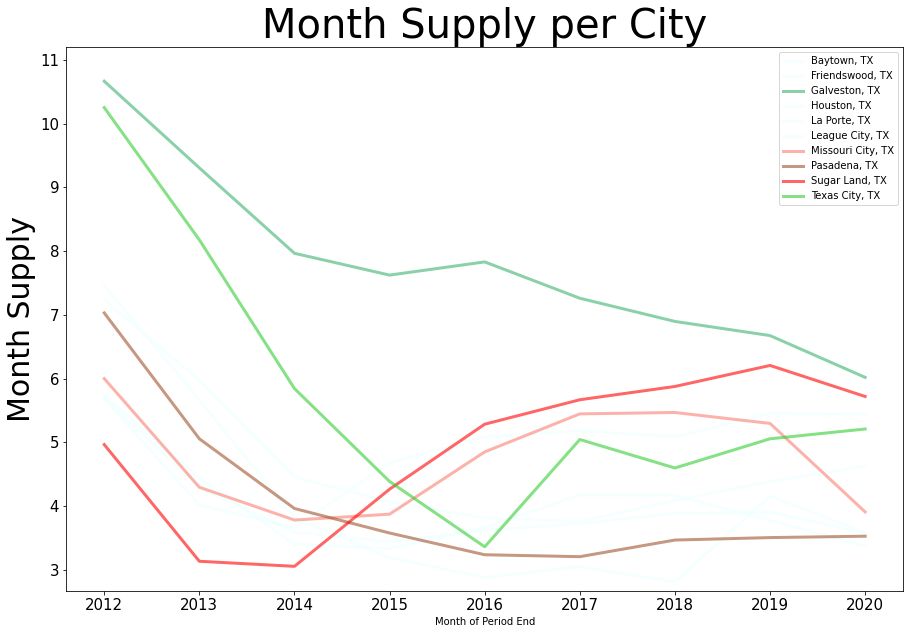

In [87]:
y_axis = grouped_supply_df["Month_Supply_Avg"].unique()
unstacked_supply = grouped_supply_df.unstack(level=0)

# colors = ["royalblue", "darkorange", "mediumseagreen", "gold", "mediumorchid", "grey", "salmon", "sienna", "red", "limegreen"]
colors = ["azure", "azure", "mediumseagreen", "azure", "azure", "azure", "salmon", "sienna", "red", "limegreen"]
# alphas = [1, .4, 1, 1, .4, .4, .4, 1, 1, .4]
unstacked_supply.plot.line(legend=False, figsize = (15,10), alpha = .6, linewidth = 3, marker="", color=colors )
plt.legend(labels = [x[1] for x in unstacked_housing.columns.tolist()], loc="best")
plt.ylabel("Month Supply", fontsize = 30)
plt.ylim(y_axis.min()*.95,y_axis.max()*1.05)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title("Month Supply per City", fontsize = 40)


## Bar Graph Median House Price

In [117]:
# Create list for axis in line graph
city_list = housing_df["Region"].unique()
avg_price = []
for city in city_list:
    cities_median = housing_df.loc[housing_df['Region'] == city]
    avg_price.append(cities_median["Median Sale Price"].mean())

price_df = pd.DataFrame({"Cities": city_list, "Average Price": avg_price })
price_df = price_df.sort_values(by=["Average Price"], ascending=False)
price_df

,Cities,Average Price
0,"Sugar Land, TX",301500.000000
6,"Friendswood, TX",239192.307692
5,"League City, TX",236057.692308
1,"Missouri City, TX",230865.384615
9,"Houston, TX",197759.615385
2,"Galveston, TX",197596.153846
4,"Baytown, TX",160634.615385
7,"La Porte, TX",152701.923077
8,"Pasadena, TX",141586.538462
3,"Texas City, TX",129634.615385


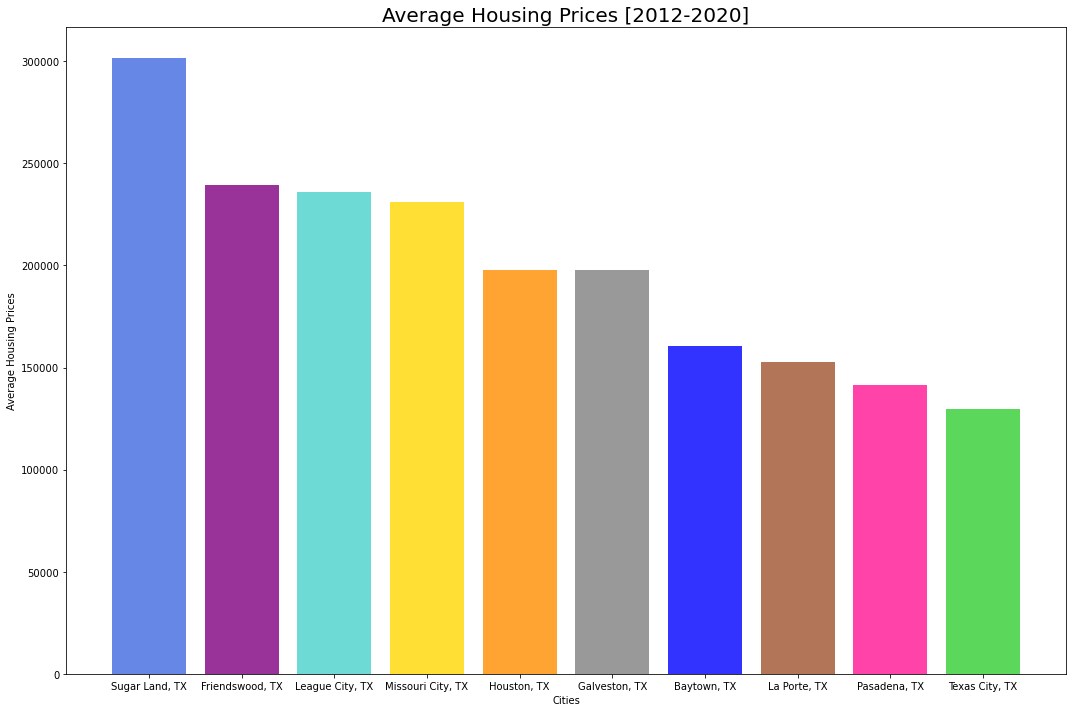

In [121]:
plt.figure(figsize=(15,10))
plt.bar(x=price_df["Cities"], height=price_df["Average Price"], color=colors,alpha=.8,align="center")
plt.xlabel("Cities")
plt.ylabel("Average Housing Prices")
plt.title("Average Housing Prices [2012-2020]", fontsize=20)
plt.tight_layout()

## Merging FBI data per county or city